# Introduction
This workshop will expand upon your Python programming skills acquired in the last session. Last week you used the $k$-nearest neighbour classifier to classify the Iris dataset. This week you will look investigate ``sklearn``'s neural network module and use it for both classification and regression.

The first thing you should do is ensure that you are up-to-date with last week's workshop.

## Question 1
Begin by importing the digits dataset from ``sklearn``. Recall how this was done with the Iris data in the last session and [look here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) for the appropriate function. When you have imported the data, use the ``MLPClassifier`` [details here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to classify the data. Construct a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for the predictions and plot using Matplotlib's [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) method.

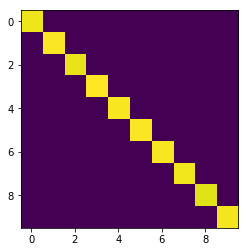

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import datasets, decomposition
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

#load the digits data
digits = sklearn.datasets.load_digits()
inputs = digits.data
targets = digits.target

#classify it
classifier = MLPClassifier()
classifier.fit(inputs, targets)
classedData = classifier.predict(inputs)

#confusion matrix
y_true = targets
y_pred = classedData
matrix = confusion_matrix(y_true, y_pred)

#show
plt.imshow(matrix)
plt.show()







## Question 2
In this week's lecture we talked about the California housing data. Load [the data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) and produce a scatter plot of any two of the features using the Matplotlib scatter function. Colour the points according to the target values.

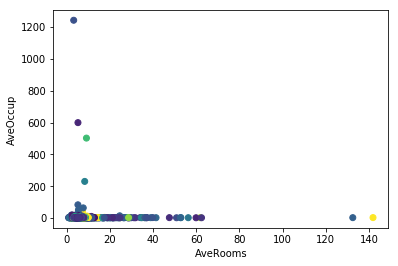

In [10]:
from sklearn import datasets
import matplotlib.pyplot as plt

#import dataset
house = datasets.fetch_california_housing()
inputs = house.data
targets = house.target

#choose attributes to plot
att1 = inputs[:,[2]]
att2 = inputs[:,[5]]

#resolve an unusual error by adding an extra empty column
colours = targets.reshape(20640, 1)

plt.figure()
plt.xlabel(house.feature_names[2])
plt.ylabel(house.feature_names[5])
plt.scatter(att1, att2, c=colours, cmap="viridis")
plt.show()

## Question 3
You need to normalise the data - use the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to normalise the data. Assuming that your data is in a variable called ``data``, use the Numpy method ``data.max(axis=0)`` to find out the maximum value in each column (print it to the screen before and after). Do the same to find the minimum value in each column.

[141.90909091]
[0.84615385]
[1243.33333333]
[0.69230769]


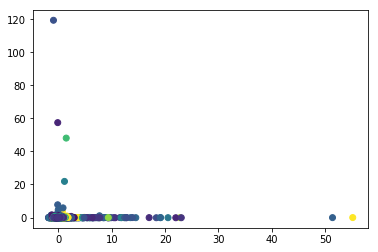

In [37]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import numpy as np

#import dataset
house = datasets.fetch_california_housing()
inputs = house.data
targets = house.target

att1 = inputs[:,[2]]
att2 = inputs[:,[5]]

scaler = StandardScaler()

colours = targets.reshape(20640, 1)

#find out maximum and minimum values
max1=att1.max(axis=0)
min1=att1.min(axis=0)
print(max1)
print(min1)

max2=att2.max(axis=0)
min2=att2.min(axis=0)
print(max2)
print(min2)

fitted1 = scaler.fit_transform(att1)
fitted2 = scaler.fit_transform(att2)

plt.figure()
#plt.xlabel(house.feature_names[2])
#plt.ylabel(house.feature_names[5])
plt.scatter(fitted1, fitted2, c=colours, cmap="viridis")
plt.show()






## Question 4
Use the ``MLPRegressor`` [details here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) to train a neural network that predicts the house price based on the dataset. Print out the __mean absolute error__ of your model according to the training data (use the whole dataset for training for now).

In [48]:
from sklearn.neural_network import MLPRegressor
#import pandas as pd
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

#import dataset
house = datasets.fetch_california_housing()
inputs = house.data
targets = house.target

#x = pd.DataFrame(inputs, columns=house.feature_names)
#y = targets

#train a decision tree
#tree = DecisionTreeRegressor()
#mlp = make_pipeline(StandardScaler(),
#                   MLPRegressor(hidden_layer_sizes=(100, 100),
#                               tol=1e-2, max_iter=500, random_state=0))
#tree.fit(x, y)
#mlp.fit(x, y)

mlp = MLPRegressor()
mlp.fit(inputs, targets)
predicted = mlp.predict(inputs)

mean_absolute_error(targets, predicted)





0.6010005917449597

## Question 5
Find out how ``sklearn`` implements [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) and use it to generate __training__ and __testing__ scores for your neural network.

In [59]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate

#import dataset
house = datasets.fetch_california_housing()
inputs = house.data
targets = house.target

mlp = MLPRegressor()
mlp.fit(inputs, targets)
predicted = mlp.predict(inputs)

mean_absolute_error(targets, predicted)

result = cross_validate(mlp, inputs, targets, return_train_score=True, cv=3)
print(result['train_score'])

[-0.55916585  0.53996372  0.54047559]
